In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
print('tf    version: {}'.format(tf.__version__) )
print('keras version: {}'.format(keras.__version__) )

tf    version: 1.14.0
keras version: 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
# print(housing.DESCR)
# print(housing.data.shape)
# print(housing.target.shape)

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)

In [4]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

### Wide Deep 模型

![images](../images/003.png)
 
函数式API

In [6]:
# inputs = keras.layers.Input(shape=x_train.shape[1:])
# hidden1 = keras.layers.Dense(30, activation='relu')(inputs)
# hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

# concat = keras.layers.concatenate([inputs, hidden2])
# output = keras.layers.Dense(1)(concat)

# model = keras.models.Model(inputs = [inputs], outputs=[output])


# model.summary()


### 子类API

In [12]:
class WideDeepModel(keras.models.Model):
    def __init__(self):
        super(WideDeepModel, self).__init__()
        self.hidden1_layer = keras.layers.Dense(30,activation='relu')
        self.hidden2_layer = keras.layers.Dense(30, activation='relu')
        self.output_layer = keras.layers.Dense(1)
        
    def call(self, input):
        hidden1 = self.hidden1_layer(input)
        hidden2 = self.hidden2_layer(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_layer(concat)
        return output
 



Model: "wide_deep_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  270       
_________________________________________________________________
dense_4 (Dense)              multiple                  930       
_________________________________________________________________
dense_5 (Dense)              multiple                  39        
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
# histories = []
# for lr in learning_rates:
#     model = WideDeepModel()
#     model.build(input_shape=(None, 8))
#     model.summary()

#     model.compile(loss='mean_squared_error', 
#                  optimizer = keras.optimizers.SGD(lr=lr),
#                  )



#     callbacks = [keras.callbacks.EarlyStopping(patience=5, 
#                                                min_delta=1e-4)
#     ]
#     history = model.fit(x_train_scaled, y_train, 
#                         validation_data= (x_valid_scaled, y_valid), 
#                        epochs = 30,
#                         callbacks= callbacks
#                        )
#     histories.append(history)

In [22]:
learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []

def build_model(hidden_layers=1, layer_size=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size, activation='relu', 
                                input_shape=x_train.shape[1:]))
    for _ in range(hidden_layers -1):
        model.add(keras.layers.Dense(layer_size, activation='relu'))
        
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

sklearn_model = keras.wrappers.scikit_learn.KerasRegressor(
build_model)

sklearn_model.fit(x_train_scaled, y_train, 
                        validation_data= (x_valid_scaled, y_valid), 
                       epochs = 30,
                        callbacks= callbacks)

 

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 84us/sample - loss: 1.3498 - val_loss: 0.7633
Epoch 2/30
11610/11610 [==============================] - 1s 56us/sample - loss: 0.6379 - val_loss: 0.6393
Epoch 3/30
11610/11610 [==============================] - 1s 56us/sample - loss: 0.5636 - val_loss: 0.5862
Epoch 4/30
11610/11610 [==============================] - 1s 56us/sample - loss: 0.5265 - val_loss: 0.5504
Epoch 5/30
11610/11610 [==============================] - 1s 56us/sample - loss: 0.5020 - val_loss: 0.5279
Epoch 6/30
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4849 - val_loss: 0.5117
Epoch 7/30
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4713 - val_loss: 0.4972
Epoch 8/30
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4669 - val_loss: 0.4895
Epoch 9/30
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4604 - val_l

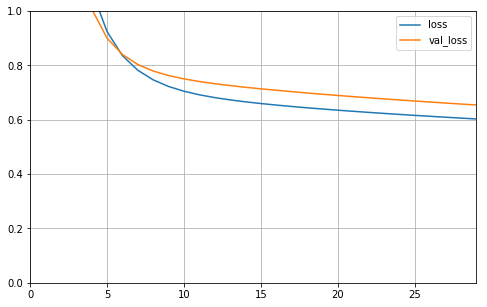

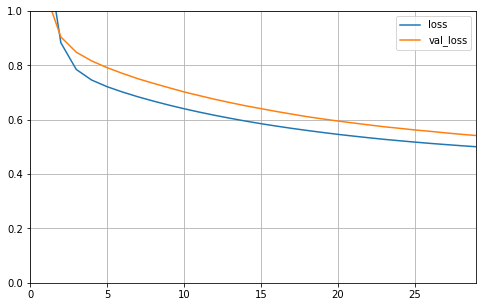

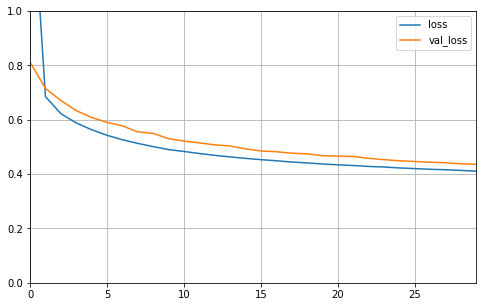

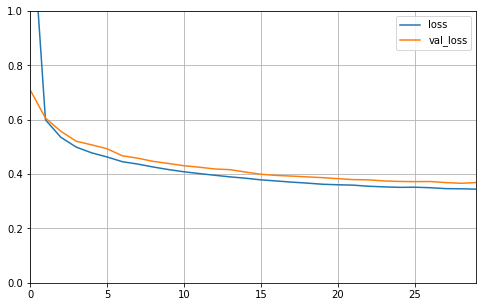

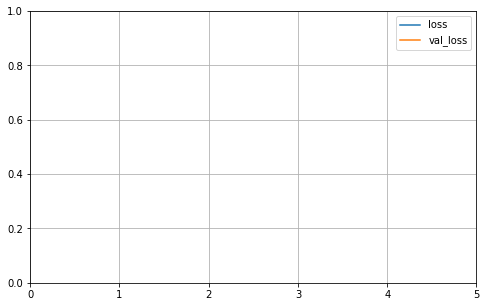

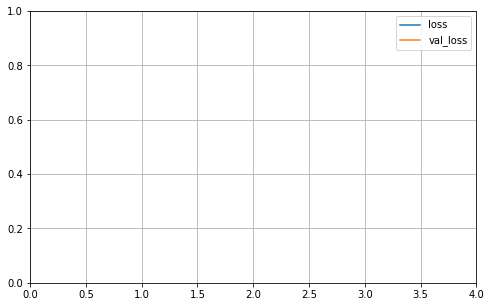

In [20]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
   
for lr, history in zip(learning_rates,histories):
    plot_learning_curves(history)